<a href="https://colab.research.google.com/github/Jignacio14/7506R-1C2023-GRUPO09/blob/Pruebas/7506R_TP1_GRUPO9_CHP1_ENTREGA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pruebas

En este jupyter notebook vamos a explorar un conjunto de datos sobre reservas de hoteles y tratar de hallar un modelo que nos permita predecir si la reserva va a ser cancelada 

In [ ]:
print("Otro mensaje completamente diferente")

Importamos todas las librerias que vamos a usar

In [ ]:
import pandas as pd 
import numpy as np
import sklearn as sk
import seaborn as sns
from matplotlib import pyplot as plt

Cargamos los datos en un dataframe de pandas. Creamos una copia del dataframe original y trabajamos encima de la copia

In [ ]:
hotelsDfOriginal = pd.read_csv("./hotels_train.csv")
hotelsdf = hotelsDfOriginal.copy()

print("El data frame esta compuesto por "f"{hotelsdf.shape[0]}"" filas y "f"{hotelsdf.shape[1]}"" columnas")

El data frame esta compuesto por 61913 filas y 33 columnas


Un vistaso básico a la información contenida en el dataframe:

In [ ]:
pd.concat([hotelsdf.head(2), hotelsdf.sample(5), hotelsdf.tail(2)])

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,id,is_canceled
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,...,NaN,0,Transient,115.50,0,1,Canceled,2016-08-25,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,...,NaN,0,Transient,42.00,1,0,Check-Out,2015-11-01,b1428f80-c56c-4ae4-91a9-6962edae08b1,0
16219,Resort Hotel,210,2017,June,25,19,2,5,2,0.0,...,NaN,0,Transient,70.20,0,0,Canceled,2017-01-31,d9c1570e-2995-42d0-88bd-8e4879b1d036,1
57297,Resort Hotel,50,2016,June,25,13,1,4,2,0.0,...,NaN,0,Transient,129.00,0,2,Canceled,2016-04-28,00a45395-1f1b-4401-85e2-fb3c2edb5726,1
11450,City Hotel,264,2017,April,15,14,1,2,3,0.0,...,NaN,0,Transient,142.20,0,0,Canceled,2016-10-23,d0828ead-edf3-4245-8b41-c5fff7800cb6,1
38099,City Hotel,286,2016,October,44,28,0,2,2,0.0,...,NaN,0,Transient,65.00,0,0,Canceled,2016-09-20,2eb3dcd8-a959-4d16-8f9e-bbe442f2c78f,1
24617,City Hotel,16,2015,September,39,25,2,3,1,0.0,...,NaN,0,Transient-Party,170.00,0,0,Check-Out,2015-09-30,16bfee94-c474-4a6a-ae49-752c5d5e7099,0
61911,Resort Hotel,143,2015,October,41,10,2,5,2,0.0,...,NaN,0,Transient,36.05,0,0,Canceled,2015-07-08,01906859-1094-4e37-b13e-b015b594d159,1
61912,City Hotel,57,2016,April,17,17,2,5,2,0.0,...,NaN,0,Transient,143.29,0,0,Canceled,2016-04-09,7137e599-4442-41fb-b147-4aba9f344e38,1


Renombramos las columnas del dataframe con nombres mas claros y en español

In [ ]:
nuevas_columnas = {
    'adr':'average_daily_rate',
    'adults':'adult_num',
    'agent':'agent_id',
    'arrival_date_day_of_month':'arrival_month_day',
    'arrival_date_month':'arrival_month',
    'arrival_date_week_number':'arrival_week_number',
    'arrival_date_year':'arrival_year',
    'assigned_room_type':'assigned_room_type',
    'babies':'babies_num',
    'booking_changes':'booking_changes_num',
    'children':'children_num',
    'company':'company_id',
    'country':'country',
    'customer_type':'customer_type',
    'days_in_waiting_list':'days_in_waiting_list',
    'deposit_type':'deposit_type',
    'distribution_channel':'distribution_channel',
    'hotel':'hotel_name',
    'id':'booking_id', #chekear con el profesor
    'is_canceled':'is_canceled',
    'is_repeated_guest':'is_repeated_guest',
    'lead_time':'lead_time',
    'market_segment':'market_segment_type',
    'meal':'meal_type',
    'previous_bookings_not_canceled':'previous_bookings_not_canceled_num',
    'previous_cancellations':'previous_cancellations_num',
    'required_car_parking_spaces':'required_car_parking_spaces_num',
    'reservation_status':'reservation_status',
    'reservation_status_date':'reservation_status_date',
    'reserved_room_type':'reserved_room_type',
    'stays_in_weekend_nights':'weekend_nights_num',
    'stays_in_week_nights':'week_nights_num',
    'total_of_special_requests':'special_requests_num',
}

hotelsdf.rename(columns = nuevas_columnas, inplace = True)

Vemos el dataset con los nuevos nombres de columnas

In [ ]:
pd.concat([hotelsdf.head(2), hotelsdf.sample(5), hotelsdf.tail(2)])

,hotel_name,lead_time,arrival_year,arrival_month,arrival_week_number,arrival_month_day,weekend_nights_num,week_nights_num,adult_num,children_num,...,company_id,days_in_waiting_list,customer_type,average_daily_rate,required_car_parking_spaces_num,special_requests_num,reservation_status,reservation_status_date,booking_id,is_canceled
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,...,NaN,0,Transient,115.50,0,1,Canceled,2016-08-25,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,...,NaN,0,Transient,42.00,1,0,Check-Out,2015-11-01,b1428f80-c56c-4ae4-91a9-6962edae08b1,0
45461,City Hotel,179,2016,September,40,30,2,2,2,0.0,...,NaN,0,Transient,113.40,0,0,Canceled,2016-08-06,97bc7137-f91a-4c75-900d-e05583c549c8,1
55153,Resort Hotel,230,2017,June,24,12,2,5,2,0.0,...,NaN,0,Transient,83.70,0,1,Canceled,2017-02-01,1d44c391-5034-4981-9386-cd82051d1d82,1
42108,City Hotel,279,2016,October,43,21,0,2,2,0.0,...,NaN,0,Transient,65.00,0,0,Canceled,2016-09-20,a7c7bd12-0ed5-4b6e-8d26-51f940d9661f,1
1206,City Hotel,168,2015,September,37,11,0,2,2,0.0,...,NaN,0,Transient-Party,60.00,0,0,Check-Out,2015-09-13,d1011d79-ed76-4ecf-96db-ca3e044701ac,0
52813,City Hotel,121,2017,May,22,28,2,2,2,0.0,...,NaN,0,Transient,148.50,0,1,Canceled,2017-01-28,65f7603a-1b35-4d6c-a12f-4899c65b7f67,1
61911,Resort Hotel,143,2015,October,41,10,2,5,2,0.0,...,NaN,0,Transient,36.05,0,0,Canceled,2015-07-08,01906859-1094-4e37-b13e-b015b594d159,1
61912,City Hotel,57,2016,April,17,17,2,5,2,0.0,...,NaN,0,Transient,143.29,0,0,Canceled,2016-04-09,7137e599-4442-41fb-b147-4aba9f344e38,1


Por otro lado, podemos observar que tipo de dato almacena cada columna y cuales tienen datos faltantes

In [ ]:
hotelsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61913 entries, 0 to 61912
Data columns (total 33 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   hotel_name                          61913 non-null  object 
 1   lead_time                           61913 non-null  int64  
 2   arrival_year                        61913 non-null  int64  
 3   arrival_month                       61913 non-null  object 
 4   arrival_week_number                 61913 non-null  int64  
 5   arrival_month_day                   61913 non-null  int64  
 6   weekend_nights_num                  61913 non-null  int64  
 7   week_nights_num                     61913 non-null  int64  
 8   adult_num                           61913 non-null  int64  
 9   children_num                        61909 non-null  float64
 10  babies_num                          61913 non-null  int64  
 11  meal_type                           61913

Segun la clasificacion de las variables podemos establecer lo siguiente sobre los datos extraidos del dataframe

Variables cuantitativas, entre las cuales podemos encontrar:

- lead_time "time beetwen reservation and arrival"
- arrival_date_year
- arrival_date_week_number  
- arrival_date_day_of_month
- stays_in_weekend_nights
- days_in_waiting_list
- stays_in_week_nights
- adult
- children
- babies
- previous_cancellations
- previous_bookings_not_canceled
- booking_changes
- days_in_waiting_list
- adr "average day rate"
- required_car_parking_spaces
- total_of_special_requests
- reservation_status_date


Creamos una lista con todas las variables cuantitativas

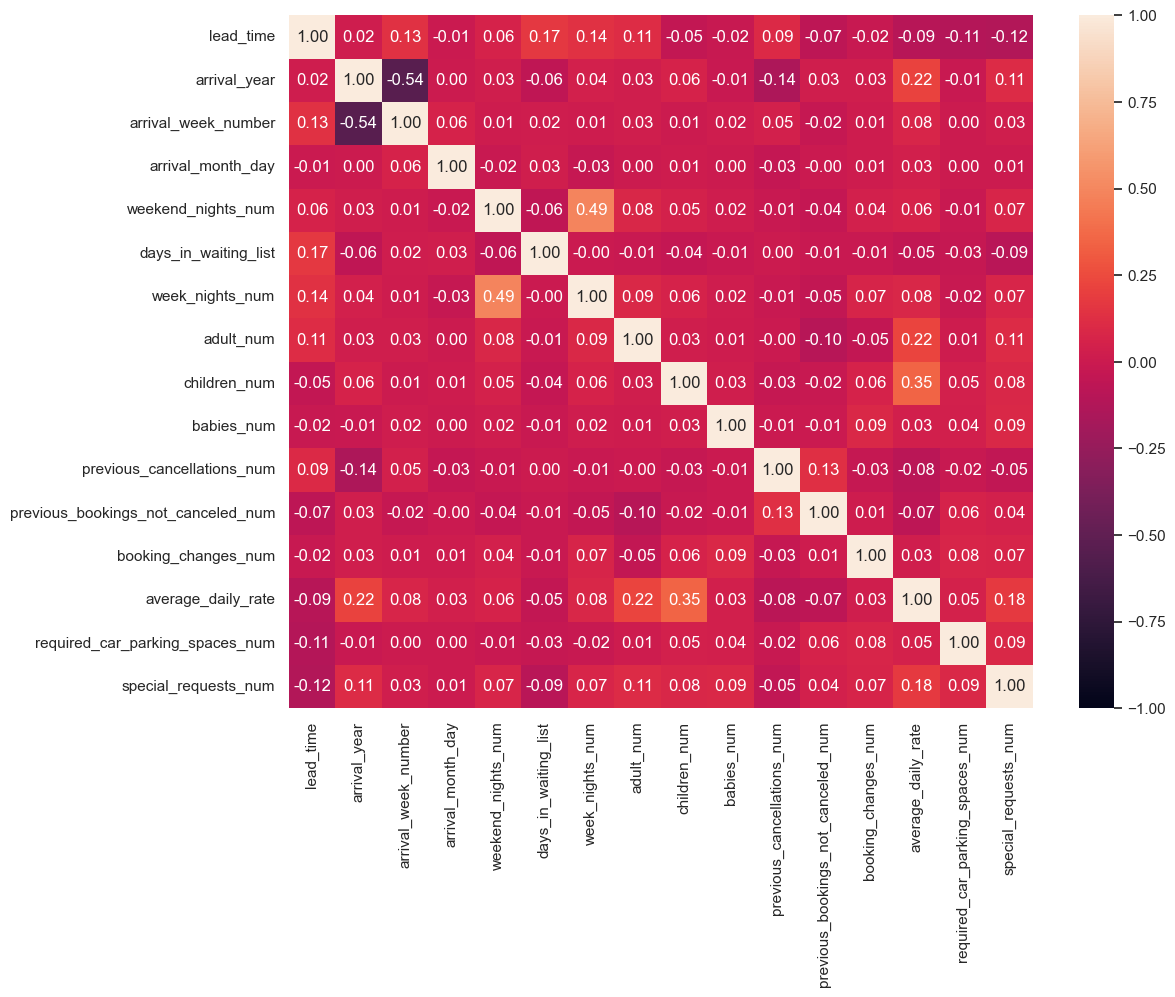

In [ ]:
cuantitativas = ["lead_time"
,"arrival_year"
,"arrival_week_number"
,"arrival_month_day"
,"weekend_nights_num"
,"days_in_waiting_list"
,"week_nights_num"
,"adult_num"
,"children_num"
,"babies_num"
,"previous_cancellations_num"
,"previous_bookings_not_canceled_num"
,"booking_changes_num"
,"average_daily_rate"
,"required_car_parking_spaces_num"
,"special_requests_num"
,"reservation_status_date"]

# Este if es se usa para evitar problemas de versiones de pandas entre la version local y la presente en Google Collab
if (pd.__version__) == "1.5.2":
    correlaciones = hotelsdf[cuantitativas].corr(numeric_only=True)
else:
    correlaciones = hotelsdf[cuantitativas].corr()

sns.set(style = 'darkgrid')
plt.figure( figsize = (12, 9))
sns.heatmap(data = correlaciones,annot = True, vmin = -1, vmax =1, fmt='.2f')
sns.color_palette("mako", as_cmap=True)
plt.show()

In [ ]:
hotelsdf[cuantitativas].describe()

,lead_time,arrival_year,arrival_week_number,arrival_month_day,weekend_nights_num,days_in_waiting_list,week_nights_num,adult_num,children_num,babies_num,previous_cancellations_num,previous_bookings_not_canceled_num,booking_changes_num,average_daily_rate,required_car_parking_spaces_num,special_requests_num
count,61913.000000,61913.000000,61913.00000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,61909.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000
mean,112.248187,2016.154749,27.21808,15.785812,0.924135,2.638977,2.510054,1.862791,0.104896,0.007155,0.114790,0.115420,0.195952,102.383773,0.049957,0.523703
std,110.717953,0.708389,13.52601,8.795489,0.993101,18.619092,1.884926,0.589066,0.402847,0.092158,0.993723,1.396359,0.610519,47.757640,0.221023,0.775412
min,0.000000,2015.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,23.000000,2016.000000,16.00000,8.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,78.000000,2016.000000,28.00000,16.000000,1.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,172.000000,2017.000000,38.00000,23.000000,2.000000,0.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,629.000000,2017.000000,53.00000,31.000000,16.000000,391.000000,40.000000,55.000000,10.000000,9.000000,26.000000,70.000000,17.000000,510.000000,8.000000,5.000000


In [ ]:
hotelsdf.isna().sum()

hotel_name                                0
lead_time                                 0
arrival_year                              0
arrival_month                             0
arrival_week_number                       0
arrival_month_day                         0
weekend_nights_num                        0
week_nights_num                           0
adult_num                                 0
children_num                              4
babies_num                                0
meal_type                                 0
country                                 221
market_segment_type                       0
distribution_channel                      0
is_repeated_guest                         0
previous_cancellations_num                0
previous_bookings_not_canceled_num        0
reserved_room_type                        0
assigned_room_type                        0
booking_changes_num                       0
deposit_type                              0
agent_id                        

Variables cualitativas

In [ ]:
cualitativas = ['hotel_name',"arrival_month", 'meal_type', 'country', 'market_segment_type', 'distribution_channel', 'is_repeated_guest', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status']

#no tiene sentido imprimir cosas como id, company, deposite_type

for variable in cualitativas:
  print(hotelsdf[variable].value_counts().index.tolist())



['City Hotel', 'Resort Hotel']
['August', 'July', 'May', 'April', 'October', 'June', 'September', 'March', 'February', 'December', 'November', 'January']
['BB', 'HB', 'SC', 'Undefined', 'FB']
['PRT', 'GBR', 'FRA', 'ESP', 'DEU', 'ITA', 'IRL', 'BRA', 'BEL', 'USA', 'NLD', 'CHE', 'CN', 'AUT', 'CHN', 'SWE', 'POL', 'RUS', 'ISR', 'NOR', 'ROU', 'AUS', 'AGO', 'DNK', 'FIN', 'LUX', 'MAR', 'TUR', 'HUN', 'ARG', 'JPN', 'KOR', 'CZE', 'IND', 'GRC', 'ZAF', 'HRV', 'MEX', 'COL', 'DZA', 'IRN', 'LTU', 'BGR', 'CHL', 'EST', 'UKR', 'SRB', 'SVK', 'ARE', 'NZL', 'SAU', 'THA', 'MOZ', 'SVN', 'CYP', 'LVA', 'PHL', 'ISL', 'IDN', 'TWN', 'HKG', 'SGP', 'EGY', 'TUN', 'NGA', 'URY', 'GEO', 'MYS', 'LBN', 'AZE', 'CPV', 'BLR', 'MAC', 'KWT', 'VEN', 'JOR', 'PAK', 'ECU', 'PER', 'QAT', 'DOM', 'GIB', 'KAZ', 'PRI', 'CRI', 'MDV', 'SEN', 'MLT', 'ALB', 'IRQ', 'MKD', 'BOL', 'AND', 'ARM', 'JEY', 'BIH', 'FRO', 'TZA', 'MUS', 'OMN', 'CUB', 'GNB', 'CIV', 'KEN', 'CMR', 'MNE', 'BEN', 'TJK', 'ETH', 'GAB', 'BGD', 'BHR', 'ZMB', 'SYR', 'GTM', 'KN

In [ ]:
print("hola mundo de german.")

In [ ]:
print('Mi equipo es el mejor!')